# Clustering

Now that we've seen how to 

1. Evaluate our RAG Pipelines
2. Systematically evaluate the effect of upgrades to our pipeline

Let's learn how to segment/cluster different queries to identify areas for improvement

In [6]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x14252ec00>
Traceback (most recent call last):
  File "/Users/ivanleo/Documents/rag-ws/venv/lib/python3.12/site-packages/llvmlite/binding/executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x14252ec00>
Traceback (most recent call last):
  File "/Users/ivanleo/Documents/rag-ws/venv/lib/python3.12/site-packages/llvmlite/binding/executionengine.py", line 187, in _raw_object_cache_notify
    buf = string_at(buf_ptr, buf_len)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/ctypes/__init__.py", line 525, in string_at
    return _string_at(ptr, size)
           ^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 


KeyboardInterrupt: 

In [2]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6763,-1_to_the_of_is,"[to, the, of, is, and, you, in, for, it, that]",[+--------------------------------------------...
1,0,1835,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[Apparently, Part 2 (defensemen numbered 2 thr..."
2,1,611,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[\nI am not an expert in the cryptography scie...
3,2,454,2_fbi_batf_koresh_fire,"[fbi, batf, koresh, fire, compound, they, gas,...",[I told some friends of mine two weeks ago tha...
4,3,447,3_why___,"[why, , , , , , , , , ]","[, , \nwhy?]"
...,...,...,...,...,...
219,218,10,218_saturn_dealer_civic_price,"[saturn, dealer, civic, price, profit, saturns...",[\n\n\nI dont know about the car comparison bu...
220,219,10,219_ted_teel_frank_0600,"[ted, teel, frank, 0600, sysadmin, juris, sui,...",[[deleted for a very good reason which I'm sur...
221,220,10,220_osiris_masonry_nimrod_leopard,"[osiris, masonry, nimrod, leopard, worshipped,...",[What an exciting thread (finally!)\n\nMitra i...
222,221,10,221_ear_wax_ears_syringe,"[ear, wax, ears, syringe, widex, vida, aids, h...",[\nYour hearing curve sounds a lot like mine (...


In [3]:
topic_model.get_topic(0)

[('game', 0.010257774737869275),
 ('team', 0.008949589307845465),
 ('games', 0.007132697519741566),
 ('he', 0.006945476168911297),
 ('players', 0.006273550793239167),
 ('season', 0.006205045472871602),
 ('hockey', 0.006082890327533067),
 ('play', 0.005726957515583543),
 ('25', 0.005597597482005515),
 ('year', 0.005579645159442865)]

In [5]:
topic_model.get_document_info(docs).head(4)


,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,\n\nI am sure some bashers of Pens fans are pr...,0,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[Apparently, Part 2 (defensemen numbered 2 thr...",game - team - games - he - players - season - ...,1.0,False
1,My brother is in the market for a high-perform...,9,9_card_drivers_diamond_driver,"[card, drivers, diamond, driver, video, ati, c...",[I have uploaded the most recent Windows drive...,card - drivers - diamond - driver - video - at...,1.0,False
2,\n\n\n\n\tFinally you said what you dream abou...,-1,-1_to_the_of_is,"[to, the, of, is, and, you, in, for, it, that]",[+--------------------------------------------...,to - the - of - is - and - you - in - for - it...,0.0,False
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,4,4_drive_scsi_drives_ide,"[drive, scsi, drives, ide, disk, controller, h...",[Computer Equipment Garage Sale:\n\nI've final...,drive - scsi - drives - ide - disk - controlle...,1.0,False


## Clustering MS-Marco

Let's try to see what topics come out of MS-Marco

In [2]:
from lib.data import get_labels

data = get_labels("../data/queries_single_label.jsonl")

In [3]:
docs = [item['query'] for item in data]

In [7]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [8]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,404,-1_what_is_the_does,"[what, is, the, does, of, how, to, in, are, and]","[who, when and where did cubism begin, how lon..."
1,0,169,0_cost_much_salary_to,"[cost, much, salary, to, how, average, for, do...",[how much does it cost to insure an engagement...
2,1,63,1_age_normal_how_long,"[age, normal, how, long, level, pressure, cred...","[how do you determine age in veiled chameleon,..."
3,2,38,2_the_lungs_of_are,"[the, lungs, of, are, which, function, tissue,...",[which types of freely movable joints are ofte...
4,3,38,3_is_loa_mauna_dormant,"[is, loa, mauna, dormant, active, plant, what,...","[is mauna loa active or dormant, is mauna loa ..."
5,4,37,4_causes_disease_pain_what,"[causes, disease, pain, what, cause, your, you...","[streptococcus anginosus causes what disease, ..."
6,5,37,5_good_foods_are_food,"[good, foods, are, food, for, diet, angora, gr...","[what foods are a good source of collagen, foo..."
7,6,37,6_name_meaning_language_mean,"[name, meaning, language, mean, the, origin, d...","[name meaning of zadkiel, what is meaning of n..."
8,7,35,7_where_island_height_tall,"[where, island, height, tall, the, world, sati...","[where in the world can rattlesnakes be found,..."
9,8,33,8_is_what_mobile_awareness,"[is, what, mobile, awareness, device, plc, com...",[can i update the iphone software then back it...


In [40]:
from lib.data import get_labels
from lib.query import full_text_search, semantic_search, hybrid_search
from lib.eval import score
from lib.models import EmbeddedPassage
from lib.db import get_table
import pandas as pd
import lancedb
from tabulate import tabulate


db = lancedb.connect("../lance")

candidates = {
    "Semantic Search": semantic_search,
    "Full Text Search": full_text_search,
}

test_data = get_labels("../data/queries_single_label.jsonl")[:100]
db = lancedb.connect("../lance")
table = get_table(db, "ms_marco", EmbeddedPassage)

# Run test_data against candidates
results = {}

for candidate, search_fn in candidates.items():
    search_results = search_fn(table, test_data, 25)
    evaluation_metrics = [
        score(retrieved_chunk_ids, query["selected_chunk_id"],["recall","mrr"])
        for retrieved_chunk_ids, query in zip(search_results, test_data)
    ]
    results[candidate] = pd.DataFrame(evaluation_metrics).mean()

# Convert the dictionary to a DataFrame
df = pd.DataFrame(results)

# Print the table
print(tabulate(df.round(2), headers="keys", tablefmt="grid"))

100%|█████████████████████████████████████████████| 100/100 [00:02<00:00, 42.10it/s]

+-----------+-------------------+--------------------+
|           |   Semantic Search |   Full Text Search |
+===========+===================+====================+
| recall@3  |              0.7  |               0.5  |
+-----------+-------------------+--------------------+
| recall@5  |              0.88 |               0.66 |
+-----------+-------------------+--------------------+
| recall@10 |              0.98 |               0.88 |
+-----------+-------------------+--------------------+
| recall@15 |              1    |               0.89 |
+-----------+-------------------+--------------------+
| recall@25 |              1    |               0.93 |
+-----------+-------------------+--------------------+
| mrr@3     |              0.46 |               0.35 |
+-----------+-------------------+--------------------+
| mrr@5     |              0.5  |               0.38 |
+-----------+-------------------+--------------------+
| mrr@10    |              0.51 |               0.42 |
+---------

In [42]:
df = pd.DataFrame({'topic': topics, 'query': docs, "chunk_id":[item['selected_chunk_id'] for item in data] })
df.head(10)

,topic,query,chunk_id
0,-1,what is rba,ca869ae1ed3f5021cb5b2a0b78cc846c
1,3,was ronald reagan a democrat,ebd6ebdb7fbbb0ae0e3248151cb73a2c
2,-1,how long do you need for sydney and surroundin...,312128ddec1425cb40e059ba2f521eff
3,0,price to install tile in shower,88ff1f6cde4ca8af5b3046d56d029a9b
4,6,why conversion observed in body,b639dba25e9a060b549d8430ea807aea
5,6,where are the lungs located in the back,3fd0aabc0e8f2f53be360044b89f3887
6,0,cost to get a patent,e4d9b1ab17aff7ce0949fa13b9516e2c
7,-1,best tragedies of ancient greece,b0ddd6c64362083fadb1119253deb5f1
8,4,what is a conifer,43da87d27d9adc823d9e9654ef0a4a4a
9,12,in animals somatic cells are produced by and g...,4ff0ed20afce65c76bdb0df809ef5025


In [43]:
def get_topic_queries(df,topic):
    return df[df['topic'] == topic][['query','chunk_id','topic']].to_dict(orient="records")    

topic_dfs = {}
for i in range(-1,16,1):
    topic_dfs[i] = get_topic_queries(df,i)

In [45]:
from lib.data import get_labels
from lib.query import full_text_search, semantic_search, hybrid_search
from lib.eval import score
from lib.models import EmbeddedPassage
from lib.db import get_table
import pandas as pd
import lancedb
from tabulate import tabulate


db = lancedb.connect("../lance")

candidates = {
    # "Semantic Search": semantic_search,
    "Full Text Search": full_text_search,
}

topics = [1,2,3,4,5]
table = get_table(db, "ms_marco", EmbeddedPassage)

# Run test_data against candidates
results = {}

for topic in topics:
    test_data = topic_dfs[topic]
    for candidate, search_fn in candidates.items():
        search_results = search_fn(table, test_data, 25)
        evaluation_metrics = [
            score(retrieved_chunk_ids, query["chunk_id"],["recall","mrr"])
            for retrieved_chunk_ids, query in zip(search_results, test_data)
        ]
        results[f"{candidate}-{topic}"] = pd.DataFrame(evaluation_metrics).mean()
        
# Print the table
print(tabulate(pd.DataFrame(results).round(2), headers="keys", tablefmt="grid"))

100%|███████████████████████████████████████████████| 45/45 [00:01<00:00, 41.51it/s]

+-----------+----------------------+----------------------+----------------------+----------------------+----------------------+
|           |   Full Text Search-1 |   Full Text Search-2 |   Full Text Search-3 |   Full Text Search-4 |   Full Text Search-5 |
+===========+======================+======================+======================+======================+======================+
| recall@3  |                 0.51 |                 0.49 |                 0.49 |                 0.62 |                 0.44 |
+-----------+----------------------+----------------------+----------------------+----------------------+----------------------+
| recall@5  |                 0.69 |                 0.69 |                 0.68 |                 0.75 |                 0.62 |
+-----------+----------------------+----------------------+----------------------+----------------------+----------------------+
| recall@10 |                 0.85 |                 0.83 |                 0.86 |               

In [46]:
from lib.data import get_labels
from lib.query import full_text_search, semantic_search, hybrid_search
from lib.eval import score
from lib.models import EmbeddedPassage
from lib.db import get_table
import pandas as pd
import lancedb
from tabulate import tabulate


db = lancedb.connect("../lance")

candidates = {
    # "Semantic Search": semantic_search,
    "Full Text Search": full_text_search,
}

topics = [6,7,8,9,10]
table = get_table(db, "ms_marco", EmbeddedPassage)

# Run test_data against candidates
results = {}

for topic in topics:
    test_data = topic_dfs[topic]
    for candidate, search_fn in candidates.items():
        search_results = search_fn(table, test_data, 25)
        evaluation_metrics = [
            score(retrieved_chunk_ids, query["chunk_id"],["recall","mrr"])
            for retrieved_chunk_ids, query in zip(search_results, test_data)
        ]
        results[f"{candidate}-{topic}"] = pd.DataFrame(evaluation_metrics).mean()
        
# Print the table
print(tabulate(pd.DataFrame(results).round(2), headers="keys", tablefmt="grid"))

100%|███████████████████████████████████████████████| 28/28 [00:00<00:00, 44.43it/s]

+-----------+----------------------+----------------------+----------------------+----------------------+-----------------------+
|           |   Full Text Search-6 |   Full Text Search-7 |   Full Text Search-8 |   Full Text Search-9 |   Full Text Search-10 |
+===========+======================+======================+======================+======================+=======================+
| recall@3  |                 0.36 |                 0.69 |                 0.34 |                 0.38 |                  0.46 |
+-----------+----------------------+----------------------+----------------------+----------------------+-----------------------+
| recall@5  |                 0.52 |                 0.81 |                 0.54 |                 0.69 |                  0.54 |
+-----------+----------------------+----------------------+----------------------+----------------------+-----------------------+
| recall@10 |                 0.8  |                 0.94 |                 0.74 |        

In [47]:
from lib.data import get_labels
from lib.query import full_text_search, semantic_search, hybrid_search
from lib.eval import score
from lib.models import EmbeddedPassage
from lib.db import get_table
import pandas as pd
import lancedb
from tabulate import tabulate


db = lancedb.connect("../lance")

candidates = {
    # "Semantic Search": semantic_search,
    "Full Text Search": full_text_search,
}

topics = [11,12,13,14,15]
table = get_table(db, "ms_marco", EmbeddedPassage)

# Run test_data against candidates
results = {}

for topic in topics:
    test_data = topic_dfs[topic]
    for candidate, search_fn in candidates.items():
        search_results = search_fn(table, test_data, 25)
        evaluation_metrics = [
            score(retrieved_chunk_ids, query["chunk_id"],["recall","mrr"])
            for retrieved_chunk_ids, query in zip(search_results, test_data)
        ]
        results[f"{candidate}-{topic}"] = pd.DataFrame(evaluation_metrics).mean()
        
# Print the table
print(tabulate(pd.DataFrame(results).round(2), headers="keys", tablefmt="grid"))

100%|███████████████████████████████████████████████| 11/11 [00:00<00:00, 43.69it/s]

+-----------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|           |   Full Text Search-11 |   Full Text Search-12 |   Full Text Search-13 |   Full Text Search-14 |   Full Text Search-15 |
+===========+=======================+=======================+=======================+=======================+=======================+
| recall@3  |                  0.52 |                  0.44 |                  0.5  |                  0.38 |                  0.45 |
+-----------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| recall@5  |                  0.62 |                  0.67 |                  0.5  |                  0.77 |                  0.73 |
+-----------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| recall@10 |                  0.9  |                  0.83 | 

In [50]:
pd.DataFrame(topic_dfs[7])

,query,chunk_id,topic
0,how tall is jack griffo,e07691ee42c25a45cba89fb03ef9a8fe,7
1,minimum height of a motorway bridge,382e36a5cb4916bc895e4a7638b9b3d5,7
2,can we skip amicalola falls to get to springer...,3e7096f3f0628c2fcd71cb804be192a3,7
3,height of the highest ocean mountain,9abff82f198dc6d324896fe314c4aaf4,7
4,where can you find canyons,5ffd96fdb897cee0c83c3d25f5cd6d94,7
5,kambos malaga contact,1cfb1e7149ec0010bc22dbb85284d17e,7
6,what counts as northern europe,a606e1748b606c85910a7dbdf71f275d,7
7,is mount everest in china,06636c1d34ec633d4a7d462b04c27f2b,7
8,where in the world can rattlesnakes be found,c80a57700b72a7c96c7bed1c036cac91,7
9,where is tib fib,8807ed77ae6e5ab6f21cbd4cf4a5e7ae,7


In [52]:
pd.DataFrame(topic_dfs[6])

,query,chunk_id,topic
0,why conversion observed in body,b639dba25e9a060b549d8430ea807aea,6
1,where are the lungs located in the back,3fd0aabc0e8f2f53be360044b89f3887,6
2,"The smallest blood vessels in your body,where ...",72ddd4f227a453ee48e9f6dee12e608d,6
3,example of involuntary muscle tissue is,c15ee4c01c4d187ea1260a07a6f78e1d,6
4,cortical functions of the brain,32404647e9cff82fe5e640a1617377d6,6
5,what part of the brain is dopamine produced,0d1ab1d6000ff35cd51e60e64b30eb36,6
6,what are the four structures of the forebrain,6c8e5c6cd6a2ac4148107883b95a059a,6
7,what is filial bonding,44d034c27946b6dc09e08f3fb4cb187b,6
8,thoracic cavity definition,6119e540da8fbb86edf9add17386131b,6
9,what is anencephaly,5bdd1bc4a45813c5b8370f80105ccb92,6


In [53]:
from lib.data import get_labels
from lib.query import full_text_search, semantic_search, hybrid_search
from lib.eval import score
from lib.models import EmbeddedPassage
from lib.db import get_table
import pandas as pd
import lancedb
from tabulate import tabulate


db = lancedb.connect("../lance")

candidates = {
    "Semantic Search": semantic_search,
    "Full Text Search": full_text_search,
}

topics = [6,7]
table = get_table(db, "ms_marco", EmbeddedPassage)

# Run test_data against candidates
results = {}

for topic in topics:
    test_data = topic_dfs[topic]
    for candidate, search_fn in candidates.items():
        search_results = search_fn(table, test_data, 25)
        evaluation_metrics = [
            score(retrieved_chunk_ids, query["chunk_id"],["recall","mrr"])
            for retrieved_chunk_ids, query in zip(search_results, test_data)
        ]
        results[f"{candidate}-{topic}"] = pd.DataFrame(evaluation_metrics).mean()
        
# Print the table
print(tabulate(pd.DataFrame(results).round(2), headers="keys", tablefmt="grid"))

100%|███████████████████████████████████████████████| 36/36 [00:00<00:00, 43.35it/s]

+-----------+---------------------+----------------------+---------------------+----------------------+
|           |   Semantic Search-6 |   Full Text Search-6 |   Semantic Search-7 |   Full Text Search-7 |
+===========+=====================+======================+=====================+======================+
| recall@3  |                0.61 |                 0.36 |                0.58 |                 0.69 |
+-----------+---------------------+----------------------+---------------------+----------------------+
| recall@5  |                0.75 |                 0.52 |                0.81 |                 0.81 |
+-----------+---------------------+----------------------+---------------------+----------------------+
| recall@10 |                0.98 |                 0.8  |                0.97 |                 0.94 |
+-----------+---------------------+----------------------+---------------------+----------------------+
| recall@15 |                0.98 |                 0.84 |      

## BrainTrust

The basic building blocks of BrainTrust are that of a Eval

In [2]:
from braintrust import Eval
 
def is_equal(expected, output):
    return expected == output
 
await Eval(
  "Say Hi Bot",
  data=lambda: [
      {
          "input": "Foo",
          "expected": "Hi Foo",
      },
      {
          "input": "Bar",
          "expected": "Hello Bar",
      },
  ],  # Replace with your eval dataset
  task=lambda input: "Hi " + input,  # Replace with your LLM call
  scores=[is_equal],
)

Experiment main-1718378848 is running at https://www.braintrust.dev/app/567/p/Say%20Hi%20Bot/experiments/main-1718378848
Say Hi Bot (data): 2it [00:00, 1433.71it/s]


Say Hi Bot (tasks):   0%|          | 0/2 [00:00<?, ?it/s]


=========================SUMMARY=========================
main-1718378848 compared to main-1718378215:
50.00% (-) 'is_equal' score	(0 improvements, 0 regressions)

0.01s (+00.20%) 'duration'	(0 improvements, 2 regressions)

See results for main-1718378848 at https://www.braintrust.dev/app/567/p/Say%20Hi%20Bot/experiments/main-1718378848


EvalResultWithSummary(summary="...", results=[...])

In [5]:
import string
from lancedb.table import Table
from tqdm import tqdm
from lib.models import EmbeddedPassage
from lib.db import get_table
import lancedb

def strip_punctuation(s):
    return s.translate(str.maketrans("", "", string.punctuation))


def full_text_search(table: Table, queries, top_k):
    data = []
    for query in tqdm(queries):
        items = (
            table.search(strip_punctuation(query["query"]), query_type="fts")
            .limit(top_k)
            .to_list()
        )
        data.append([item for item in items])
    return data


db = lancedb.connect("../lance")
table = get_table(db, "ms_marco", EmbeddedPassage)


In [4]:
from lib.eval import calculate_recall, calculate_reciprocal_rank
from lib.data import get_labels
from itertools import product

metrics = {
    "recall": calculate_recall,
    "mrr": calculate_reciprocal_rank
}

def score(preds, label: str | list[str], sizes:list[int], metrics):
    return {
        f"{fn_name}@{size}": round(
            metrics[fn_name](
                preds[:size], [label] if isinstance(label, str) else label
            ),
            3,
        )
        for fn_name, size in product(metrics, sizes)
    }

test_data = get_labels("../data/queries_single_label.jsonl")[:100]

In [8]:
retrieved_items = full_text_search(table,test_data,25)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.17it/s]


In [20]:
from bertopic import BERTopic

data = get_labels("../data/queries_single_label.jsonl")
docs = [item['query'] for item in data]
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

In [22]:
import pandas as pd

df = pd.DataFrame({'topic': topics, 'query': docs, "chunk_id":[item['selected_chunk_id'] for item in data] })
df.head(10)

,topic,query,chunk_id
0,-1,what is rba,ca869ae1ed3f5021cb5b2a0b78cc846c
1,-1,was ronald reagan a democrat,ebd6ebdb7fbbb0ae0e3248151cb73a2c
2,-1,how long do you need for sydney and surroundin...,312128ddec1425cb40e059ba2f521eff
3,0,price to install tile in shower,88ff1f6cde4ca8af5b3046d56d029a9b
4,2,why conversion observed in body,b639dba25e9a060b549d8430ea807aea
5,2,where are the lungs located in the back,3fd0aabc0e8f2f53be360044b89f3887
6,0,cost to get a patent,e4d9b1ab17aff7ce0949fa13b9516e2c
7,-1,best tragedies of ancient greece,b0ddd6c64362083fadb1119253deb5f1
8,15,what is a conifer,43da87d27d9adc823d9e9654ef0a4a4a
9,10,in animals somatic cells are produced by and g...,4ff0ed20afce65c76bdb0df809ef5025


In [32]:
df.to_csv('../data/ms-marco.csv', index=False)

In [2]:
import pandas as pd
df = pd.read_csv('../data/ms-marco.csv')


In [21]:
[i for i in df['topic'].unique() if i != -1]

[0, 2, 15, 10, 18, 11, 9, 12, 1, 6, 17, 5, 3, 4, 7, 14, 19, 13, 8, 16]

In [24]:
import braintrust
from tqdm import tqdm

experiment = braintrust.init(project="MS Marco Clustering v2")  # Replace with your project name

SIZES = [1,4]
metrics = {
    "recall": calculate_recall,
    "mrr": calculate_reciprocal_rank
}

db = lancedb.connect("../lance")
table = get_table(db, "ms_marco", EmbeddedPassage)

for topic in [i for i in df['topic'].unique() if i != -1]:
    experiment = braintrust.init(project="MS Marco Clustering", experiment = f"Topic {topic}")  # Replace with your project name
    test_data = df[df['topic']==topic].to_dict(orient="records")    
    retrieved_items = full_text_search(table,test_data,25)
    idx = 0
    for retrieval,label in tqdm(zip(retrieved_items,test_data),desc = f"Processing Topic {topic}"):
        with experiment.start_span() as span:
            chunk_ids = [item['chunk_id'] for item in retrieval]
            query_chunk_id = label['chunk_id']
            res = score(chunk_ids,query_chunk_id, [3,5,7,15,25], metrics)
            span.log(
                input=label['query'],
                output=retrieval,
                expected=query_chunk_id,
                scores=res,
                metadata = {
                    "Topic": topic,
                    "query" : label['query']
                }
            )
            idx+=1

100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:04<00:00, 40.55it/s]
Processing Topic 0: 167it [00:10, 16.55it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.37it/s]
Processing Topic 2: 49it [00:02, 22.80it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 44.78it/s]
Processing Topic 15: 14it [00:00, 23.56it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 45.40it/s]
Processing Topic 10: 21it [00:00, 22.35it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 37.38it/s]
Processing Topic 18: 10it [00:00, 23.12it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.45it/s]
Pr

In [23]:
summary = experiment.summarize(summarize_scores=True)
print(summary)


=========================SUMMARY=========================
Topic 16 compared to Topic 8:
15.38% 'mrr@3'     score
23.84% 'mrr@5'     score
26.41% 'mrr@7'     score
26.41% 'mrr@15'    score
26.41% 'mrr@25'    score
38.46% 'recall@3'  score
76.92% 'recall@5'  score
92.31% 'recall@7'  score
92.31% 'recall@15' score
92.31% 'recall@25' score

0.04s duration

See results for Topic 16 at https://www.braintrust.dev/app/567/p/MS%20Marco%20Clustering/experiments/Topic%2016


By using BrainTree, we're able to collaborate more closely with other team members to identify unique trends

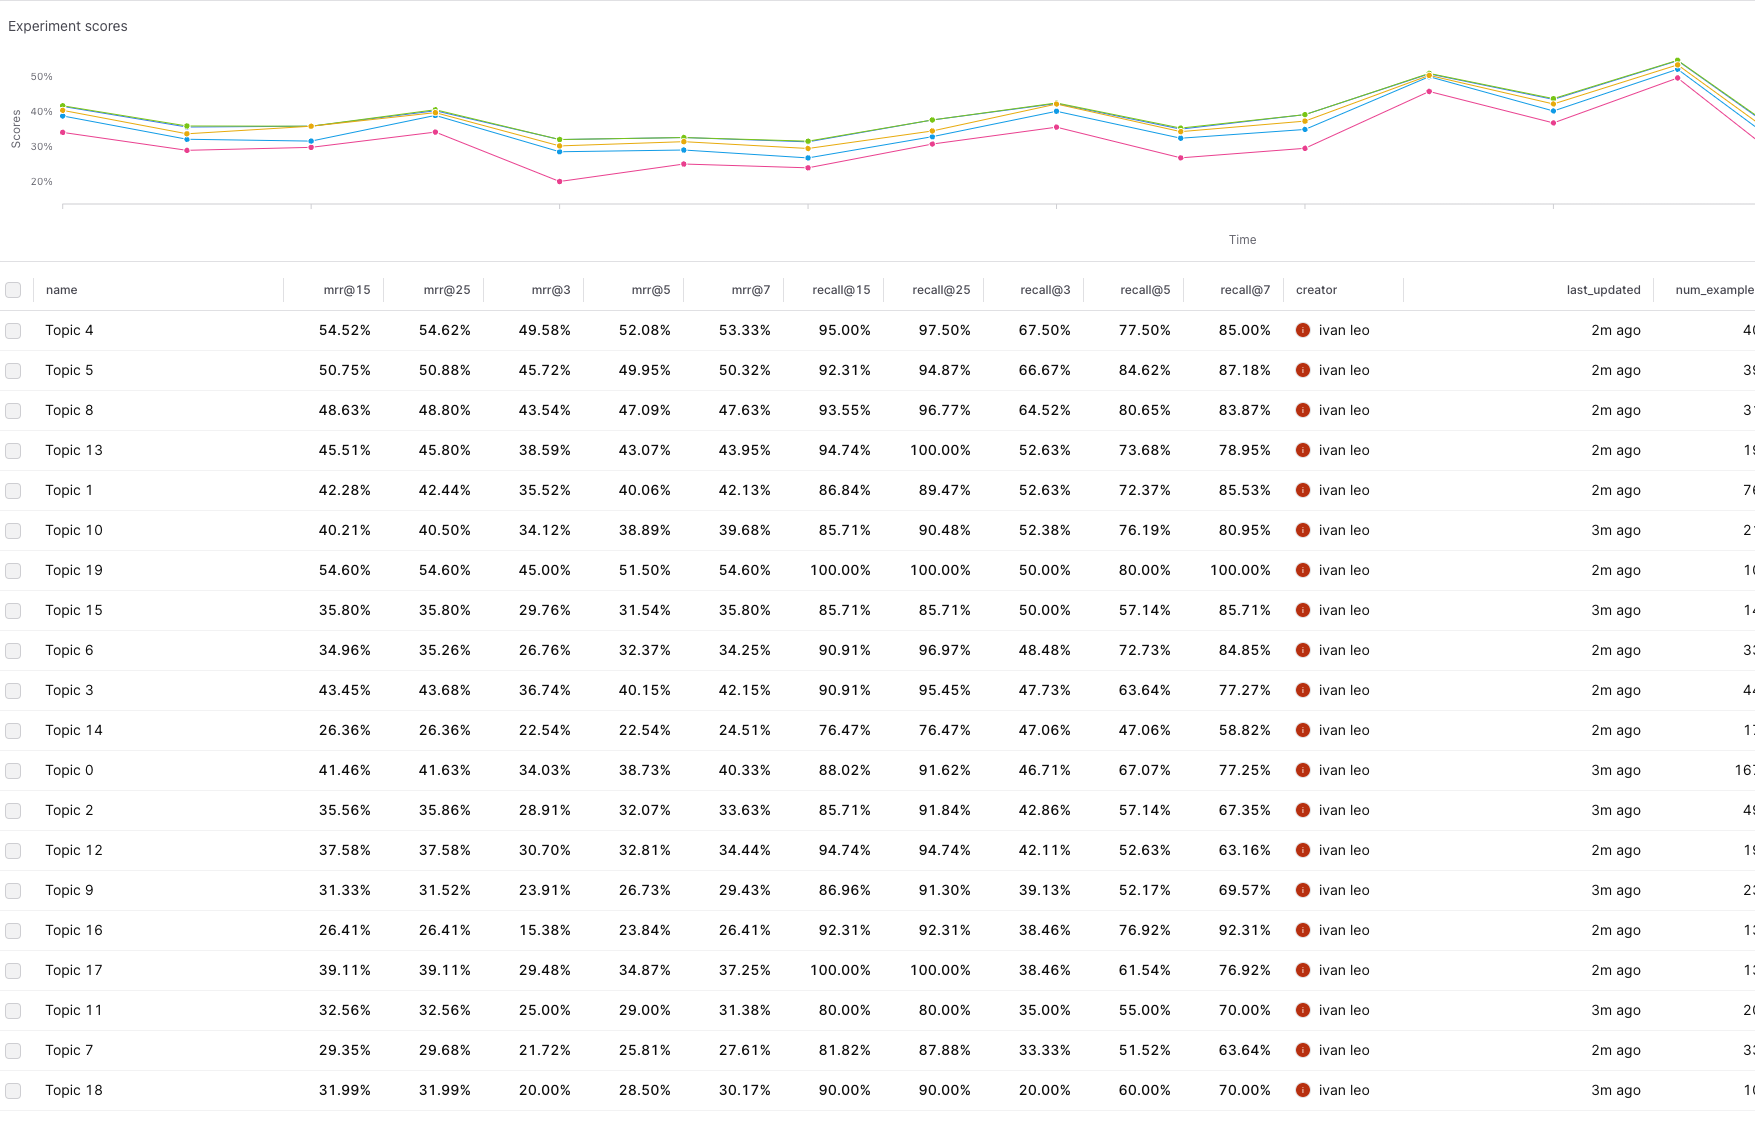